## Complex Number Class

In [1]:
import math

class Complex:
  def __init__(self, real, imag):
    self.real, self.imag = real, imag
    
    self.modulus = (self.real**2 + self.imag**2) ** 0.5
    self.argument = math.atan(self.imag / self.real)
    
  def __add__(self, other):
    if isinstance(other, Complex):
      return Complex(self.real+other.real, self.imag+other.imag)
    return Complex(self.real+other, self.imag)
  
  def __radd__(self, other): return self.__add__(other)
  
  def __neg__(self): return Complex(-self.real, -self.imag)
  
  def __sub__(self, other): return self + (-other)

  def __rsub__(self, other): return -self + other

  def __pow__(self, other):
    # Euler's Formula
    c = Complex(math.log(self.modulus), self.argument) * other
    return math.exp(c.real) * Complex(math.cos(c.imag), math.sin(c.imag))
  
  def __mul__(self, other):
    a1, b1 = self.real, self.imag
    a2, b2 = (other.real, other.imag) if isinstance(other, Complex) else (other, 0)
    real = a1 * a2 - b1 * b2
    imag = a1 * b2 + a2 * b1
    return Complex(real, imag)
  
  def __rmul__(self, other): return self.__mul__(other)
  
  def __truediv__(self, other):
    if isinstance(other, Complex):
      return self * other.conjugate() / other.modulus**2
    return Complex(self.real / other, self.imag / other)
  
  def __rtruediv__(self, other): return other * self.__pow__(-1)
  
  def __repr__(self): return f"({self.real}{self.imag:+}i)"
  
  def __str__(self): return f"({self.real}{self.imag:+}i)"
  
  def conjugate(self): return Complex(self.real, -self.imag)
  

## quick check

In [2]:
import cmath

def check(a:Complex, b:complex):
  is_close = lambda a, b: abs(a - b) < 1e-5
  if is_close(a.real, b.real) and is_close(a.imag, b.imag):
    print(f"[PASS] a=b={a}")
  else:
    print(f"[FAILED] a={a} b={b}")

x1, y1 = Complex(3, 4), Complex(4, 5)
x2, y2 = complex(3, 4), complex(4, 5)

check(-x1, -x2)

check(1+x1, 1+x2)
check(1-x1, 1-x2)
check(x1-1, x2-1)
check(x1+y1, x2+y2)
check(x1-y1, x2-y2)

check(2*x1, 2*x2)
check(x1*2, x2*2)
check(x1*y1, x2*y2)

check(3/x1, 3/x2)
check(x1/3, x2/3)
check(x1/y1, x2/y2)

check(x1**2, x2**2)
check(x1**0.5, x2**0.5)

check(x1**x1, x2**x2)

[PASS] a=b=(-3-4i)
[PASS] a=b=(4+4i)
[PASS] a=b=(-2-4i)
[PASS] a=b=(2+4i)
[PASS] a=b=(7+9i)
[PASS] a=b=(-1-1i)
[PASS] a=b=(6+8i)
[PASS] a=b=(6+8i)
[PASS] a=b=(-8+31i)
[PASS] a=b=(0.36-0.48i)
[PASS] a=b=(1.0+1.3333333333333333i)
[PASS] a=b=(0.7804878048780488+0.024390243902439025i)
[PASS] a=b=(-6.999999999999997+24.0i)
[PASS] a=b=(2.0+1.0i)
[PASS] a=b=(-2.9979905984214006+0.623784586279047i)


## properties

In [3]:
import matplotlib.pyplot as plt


def plot_complex_numbers(xs:list[Complex]):
  plt.figure(figsize=(6, 4))
  val_x_axis = [0] + [x.real for x in xs]
  val_y_axis = [0] + [x.imag for x in xs]
  delta_x_axis = max(val_x_axis) - min(val_x_axis) 
  delta_y_axis = max(val_y_axis) - min(val_y_axis) 
  
  plt.grid()
  xlim1, xlim2 = min(val_x_axis) - 0.3*delta_x_axis, max(val_x_axis) + 0.3*delta_x_axis
  ylim1, ylim2 = min(val_y_axis) - 0.3*delta_y_axis, max(val_y_axis) + 0.3*delta_y_axis
  plt.xlim(xlim1, xlim2)
  plt.ylim(ylim1, ylim2)
  colors = "bgrcmykw"
  for i, x in enumerate(xs):
    c = colors[i % len(colors)]
    #plt.scatter(x.real, x.imag, color=c, alpha=0.5, label=str(x))
    plt.quiver(0, 0, x.real, x.imag, angles="xy", scale_units="xy", scale=1, color=c, alpha=0.5, width=0.005, label=str(x))
  plt.legend()
  plt.show()

### 复数加减法 -> 平面上的滑动

- 实数的加减法可以看做数值在一维数轴上的左右滑动
- 类似的，复数的加减法可以看做在二维平面上的滑动


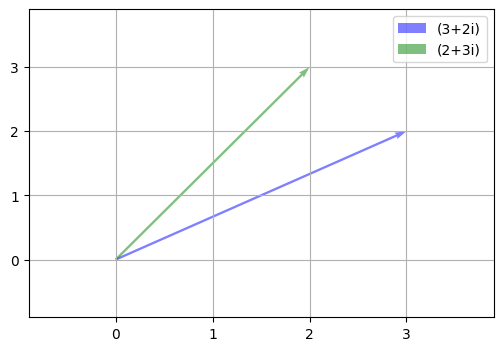

In [4]:
x = Complex(3, 2)
y = x + Complex(-1, 1)
plot_complex_numbers([x, y])

### 复数乘法 -> 平面上的旋转和缩放

复数 x 乘复数 y，从几何角度理解，相当于在复平面上:
1. 旋转：将 x 辐角增加旋转 y 的辐角
2. 缩放：再将 x 向量的模缩放为原来的 |y| 倍

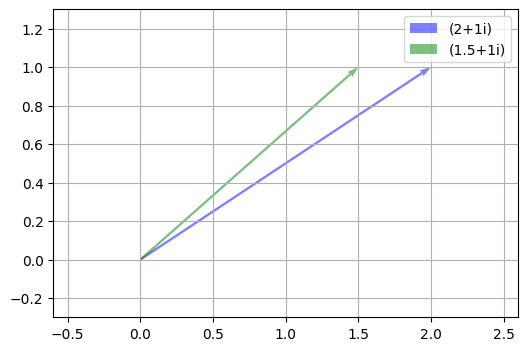

In [5]:
import math

def get_angle(c:Complex) -> float:
  return c.argument * 180 / math.pi
  
x = Complex(2, 1)
y = Complex(1.5, 1)

plot_complex_numbers([x, y])

- 相乘后的向量的辐角等于两个向量辐角相加 
    $$\theta(x*y) = \theta(x) + \theta(y)$$

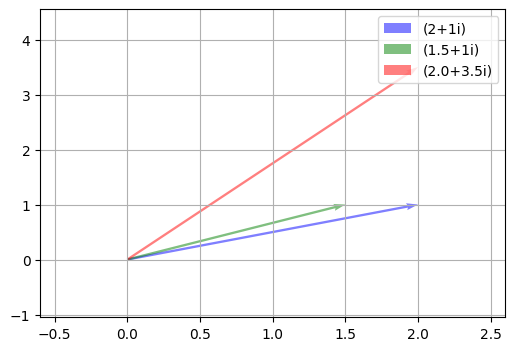

Argument of x(puple): 26.57 degree
Argument of y(green): 33.69 degree
Argument of x*y(red): 60.26 degree


In [6]:
plot_complex_numbers([x, y, x*y])
print(f"Argument of x(puple): {get_angle(x):.2f} degree")
print(f"Argument of y(green): {get_angle(y):.2f} degree")
print(f"Argument of x*y(red): {get_angle(x*y):.2f} degree")

- 相乘后向量的模等于两个向量模的积
    $$|x*y| = |x| * |x|$$

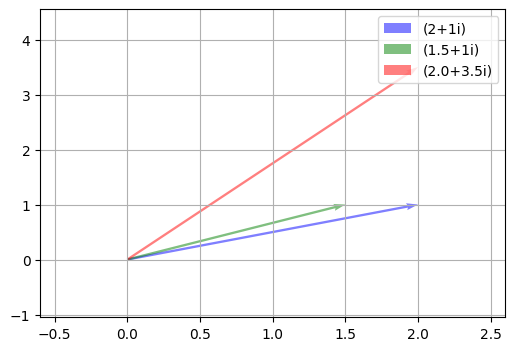

Modulus of x(puple): 2.24
Modulus of y(green): 1.80
Modulus of x*y(red): 4.03


In [7]:
plot_complex_numbers([x, y, x*y])
print(f"Modulus of x(puple): {x.modulus:.2f}")
print(f"Modulus of y(green): {y.modulus:.2f}")
print(f"Modulus of x*y(red): {(x*y).modulus:.2f}")

### 复数除法 -> 乘法的逆向操作

复数 x 除以复数 y，相当于在复平面上:
1. 旋转：将 x 向量的角度**逆向**旋转 y 向量角度
2. 缩放：再将 x 向量的模缩放为原来的 1/|y| 倍

In [8]:
x = Complex(2, 1)
y = Complex(1.5, 1)

为了将向量 x 逆向旋转 y 向量角度，我们可以用 x 乘上 y 的共轭复数 y*。

- 一个复数 a+bj 共轭向量指的是实部相等，但虚部为原复数虚部取负的复数，即 a-bj
- 从复平面上看共轭向量与原向量关于 x 轴对称，从前面乘法可以知道，这样向量与其共轭向量的角度相加后，新向量的角度为 0。假如原向量的角度 theta, 则乘上共轭向量后角度变为 0，相当于是逆向旋转了 theta

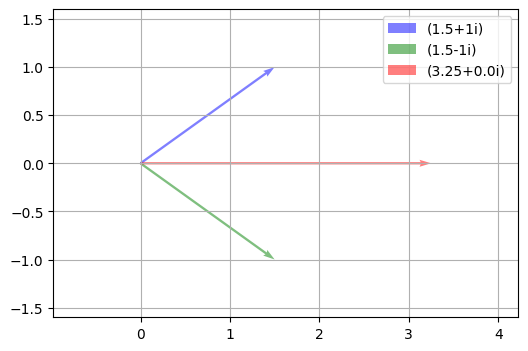

In [9]:
y_c = Complex(1.5, -1)
plot_complex_numbers([y, y_c, y*y_c])

乘上共轭向量后虽然完成逆向旋转了，但是向量的模也变了，因此我们还需要将向量的模还原

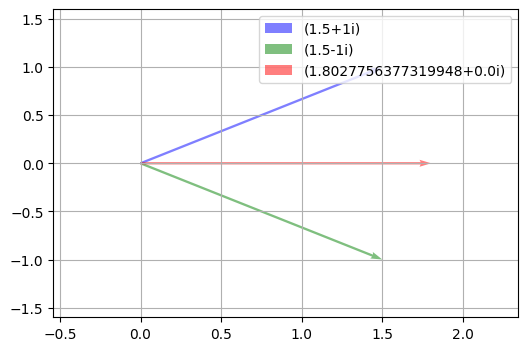

In [10]:
plot_complex_numbers([y, y_c, y*y_c/y.modulus])

现在我们回到除法里面，通过乘上共轭向量以及缩放，我们已经完成了第一步，接着第二步比较简单，只需要再缩放一次即可

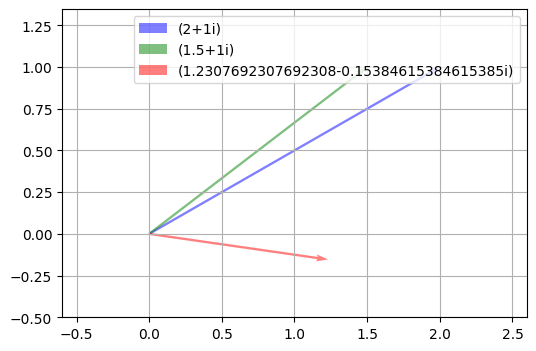

our calculation: (1.2307692307692308-0.15384615384615385i)
ground truth: (1.2307692307692308-0.15384615384615385i)
Argument of x(puple): 26.57 degree
Argument of y(green): 33.69 degree
Argument of x*y(red): -7.13 degree
Modulus of x(puple): 2.24
Modulus of y(green): 1.80
Modulus of x*y(red): 1.24


In [11]:
x = Complex(2, 1)
y = Complex(1.5, 1)
y_c = Complex(1.5, -1)


div = (x * y_c / y.modulus) / y.modulus

plot_complex_numbers([x, y, div])
print(f"our calculation: {div}")
print(f"ground truth: {x / y}")

print(f"Argument of x(puple): {get_angle(x):.2f} degree")
print(f"Argument of y(green): {get_angle(y):.2f} degree")
print(f"Argument of x*y(red): {get_angle(x/y):.2f} degree")

print(f"Modulus of x(puple): {x.modulus:.2f}")
print(f"Modulus of y(green): {y.modulus:.2f}")
print(f"Modulus of x*y(red): {(x/y).modulus:.2f}")

### 幂运算

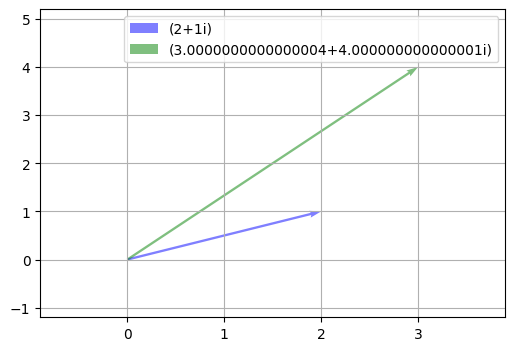

In [12]:
x = Complex(2, 1)
x ** 2
plot_complex_numbers([x, x**2])

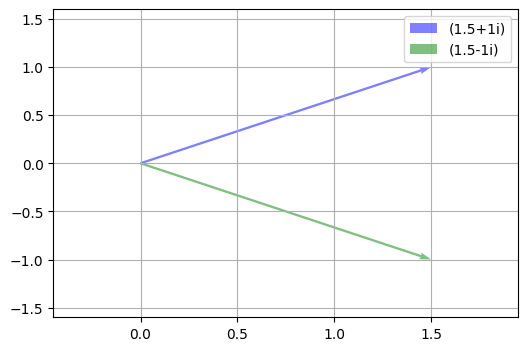

In [13]:
y = Complex(1.5, 1)
y_c = Complex(1.5, -1)
plot_complex_numbers([y, y_c])